## Assignment is below at the bottom

Video 13.1
https://www.youtube.com/watch?v=kIGHE7Cfe1s

Video 13.2
https://www.youtube.com/watch?v=Rm9bJcDd1KU

Video 13.3
https://youtu.be/6HjZk-3LsjE

In [1]:
from keras.callbacks import TensorBoard
from keras.layers import Input, Dense
from keras.models import Model
from keras.datasets import mnist     
import numpy as np

# use mnist as our source of standard number images
(xtrain, ytrain), (xtest, ytest) = mnist.load_data()

# flatten the data from mnist
xtrain = xtrain.astype('float32') / 255.
xtest = xtest.astype('float32') / 255.
xtrain = xtrain.reshape((len(xtrain), np.prod(xtrain.shape[1:])))
xtest = xtest.reshape((len(xtest), np.prod(xtest.shape[1:])))
# see what the flattend data looks like
xtrain.shape, xtest.shape

((60000, 784), (10000, 784))

The shape of the data is 60000 (or 10000) samples of size 784.
The 28x28 images were converted in single vectores of length 784.

In [24]:

# this is the size of our encoded representations
encoding_dim = 4  # 32 floats -> compression of factor 24.5, assuming the input is 784 floats

# this is our input placeholder
x = input_img = Input(shape=(784,))    # 784 is the size of our input image.

# "encoded" is the encoded representation of the input
x = Dense(256, activation='relu')(x)    # 256 is the size of the first layer
                                        # Creates a matrix of 784x256
x = Dense(128, activation='relu')(x)    # 128 is the size of the second layer
encoded = Dense(encoding_dim, activation='relu')(x)   # 32 is the size of the third layer, based on encoding_dim
# Essentially what the above is reduce the 784 into a compressed ourput of 32

# Now we go through the processed of passing it back up to 784
# "decoded" is the lossy reconstruction of the input
x = Dense(128, activation='relu')(encoded)
x = Dense(256, activation='relu')(x)
decoded = Dense(784, activation='sigmoid')(x)

# this model maps an input to its reconstruction
autoencoder = Model(input_img, decoded)

encoder = Model(input_img, encoded)

# create a placeholder for an encoded (32-dimensional) input
encoded_input = Input(shape=(encoding_dim,))
# retrieve the last layer of the autoencoder model
dcd1 = autoencoder.layers[-1]
dcd2 = autoencoder.layers[-2]
dcd3 = autoencoder.layers[-3]

# create the decoder model
decoder = Model(encoded_input, dcd1(dcd2(dcd3(encoded_input))))

In [25]:
autoencoder.compile(optimizer='adam', loss='binary_crossentropy')

Note that in the next step, we do __NOT__ use _ytrain_, because our output is intended to look like our input.

Before running the following, need to pass in the following to the command line:

`tensorboard --logdir /tmp/autoencoder`

In [26]:
autoencoder.fit(xtrain, xtrain,
                epochs=50,
                batch_size=256,
                shuffle=True,
                validation_data=(xtest, xtest),
                callbacks=[TensorBoard(log_dir='/tmp/autoencoder')])             #   )

Epoch 1/50
235/235 ━━━━━━━━━━━━━━━━━━━━ 7s 18ms/step - loss: 0.3253 - val_loss: 0.1909
Epoch 2/50
235/235 ━━━━━━━━━━━━━━━━━━━━ 4s 18ms/step - loss: 0.1852 - val_loss: 0.1732
Epoch 3/50
235/235 ━━━━━━━━━━━━━━━━━━━━ 4s 17ms/step - loss: 0.1716 - val_loss: 0.1677
Epoch 4/50
235/235 ━━━━━━━━━━━━━━━━━━━━ 4s 17ms/step - loss: 0.1662 - val_loss: 0.1634
Epoch 5/50
235/235 ━━━━━━━━━━━━━━━━━━━━ 4s 16ms/step - loss: 0.1624 - val_loss: 0.1597
Epoch 6/50
235/235 ━━━━━━━━━━━━━━━━━━━━ 4s 17ms/step - loss: 0.1596 - val_loss: 0.1578
Epoch 7/50
235/235 ━━━━━━━━━━━━━━━━━━━━ 4s 17ms/step - loss: 0.1573 - val_loss: 0.1563
Epoch 8/50
235/235 ━━━━━━━━━━━━━━━━━━━━ 4s 17ms/step - loss: 0.1556 - val_loss: 0.1546
Epoch 9/50
235/235 ━━━━━━━━━━━━━━━━━━━━ 4s 17ms/step - loss: 0.1542 - val_loss: 0.1535
Epoch 10/50
235/235 ━━━━━━━━━━━━━━━━━━━━ 4s 17ms/step - loss: 0.1527 - val_loss: 0.1522
Epoch 11/50
235/235 ━━━━━━━━━━━━━━━━━━━━ 4s 17ms/step - loss: 0.1516 - val_loss: 0.1514
Epoch 12/50
235/235 ━━━━━━━━━━━━━━━━━━━━ 

__NOTE: The following 4 sections of code are actually dependent on the section after, where _encoded_imgs_ is defined.__

In [19]:
encoded_imgs

array([[ 0.       ,  9.305806 ,  0.       , ...,  8.658742 ,  7.0072103,
         7.391556 ],
       [ 0.       ,  7.1659074,  0.       , ...,  2.6591992,  1.3690006,
         6.2390404],
       [ 0.       ,  9.21134  ,  0.       , ...,  5.148425 ,  9.8688545,
         5.1072907],
       ...,
       [ 0.       ,  5.815284 ,  0.       , ..., 11.878575 , 10.057622 ,
         4.071884 ],
       [ 0.       , 10.766088 ,  0.       , ..., 10.647941 , 10.193852 ,
         6.8343534],
       [ 0.       ,  4.684488 ,  0.       , ..., 10.486044 ,  6.517825 ,
         9.609956 ]], dtype=float32)

In [39]:
noise = np.random.normal(20,4, (4,4))    # Note this is dependent on the size of the encoder output in encoding_dim.
noise_preds = decoder.predict(noise)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step


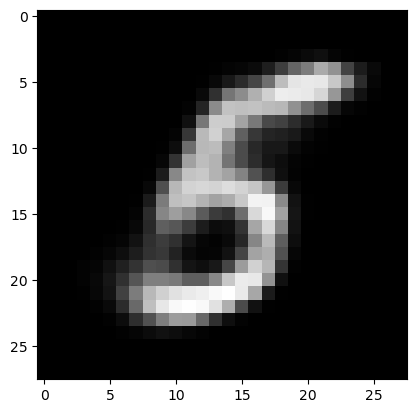

In [40]:
# Construct images from random numbers provided in the above noise
plt.imshow(noise_preds[1].reshape(28,28))

In [37]:
np.max(encoded_imgs)

69.18018

#### Did the autoencoder spit back out the images that we gave it?

The following looks at the input images and comapres to the output images.

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step
313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step


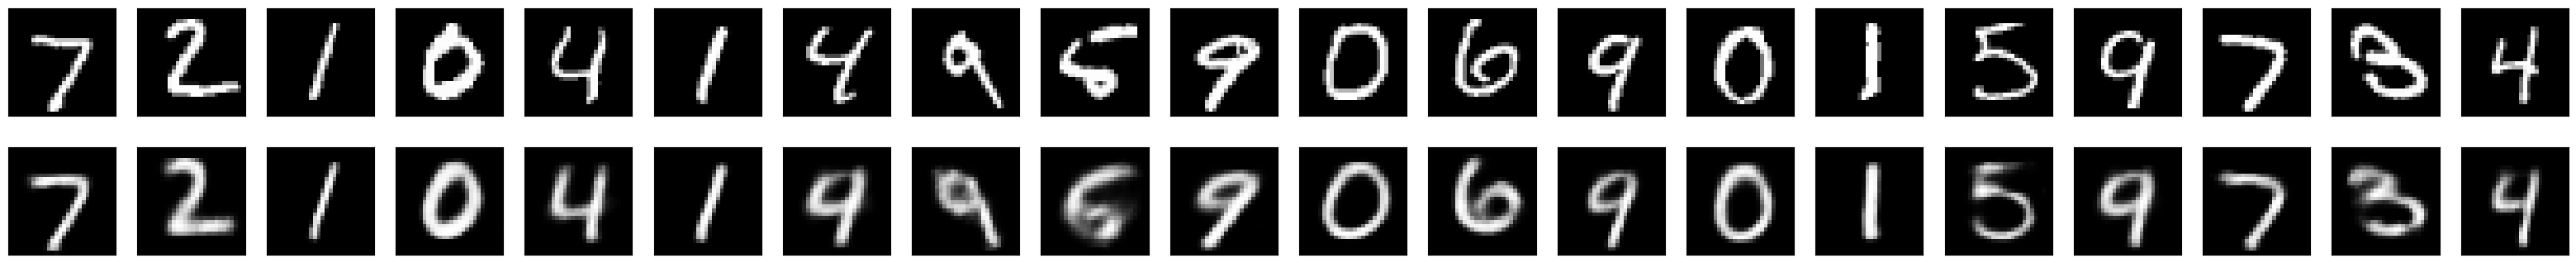

In [27]:
encoded_imgs = encoder.predict(xtest)
decoded_imgs = decoder.predict(encoded_imgs)
import matplotlib.pyplot as plt

n = 20  # how many digits we will display
plt.figure(figsize=(40, 4))
for i in range(n):
    # display original
    ax = plt.subplot(2, n, i + 1)
    plt.imshow(xtest[i].reshape(28, 28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)

    # display reconstruction
    ax = plt.subplot(2, n, i + 1 + n)
    plt.imshow(decoded_imgs[i].reshape(28, 28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
plt.show()

In [13]:
encoded_imgs

array([[ 0.       ,  9.305806 ,  0.       , ...,  8.658742 ,  7.0072103,
         7.391556 ],
       [ 0.       ,  7.1659074,  0.       , ...,  2.6591992,  1.3690006,
         6.2390404],
       [ 0.       ,  9.21134  ,  0.       , ...,  5.148425 ,  9.8688545,
         5.1072907],
       ...,
       [ 0.       ,  5.815284 ,  0.       , ..., 11.878575 , 10.057622 ,
         4.071884 ],
       [ 0.       , 10.766088 ,  0.       , ..., 10.647941 , 10.193852 ,
         6.8343534],
       [ 0.       ,  4.684488 ,  0.       , ..., 10.486044 ,  6.517825 ,
         9.609956 ]], dtype=float32)

In [14]:
%matplotlib inline

#### Visualize the encoding

In the visuals below, the color refers to the actual number, i.e. 0 is one color, 1 is another, 2 is another, etc.

The seapration of colors indicates that the autoencoder is groupign the numbers together based on the values in the 4 dimensions we have reduced to.

Each chart is looking at 2 of the 4 values that we reduce the 784 input values to.

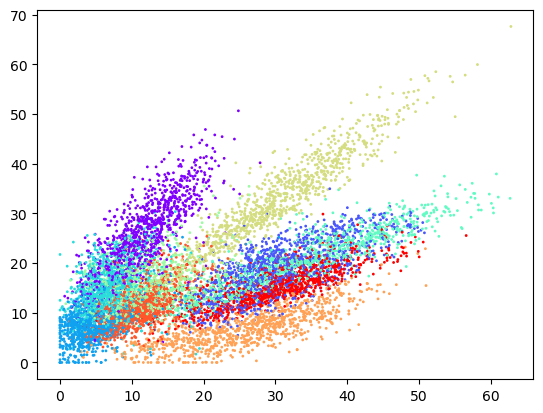

In [28]:
plt.scatter(encoded_imgs[:,1], encoded_imgs[:,0], s=1, c=ytest, cmap='rainbow')
# plt.show()

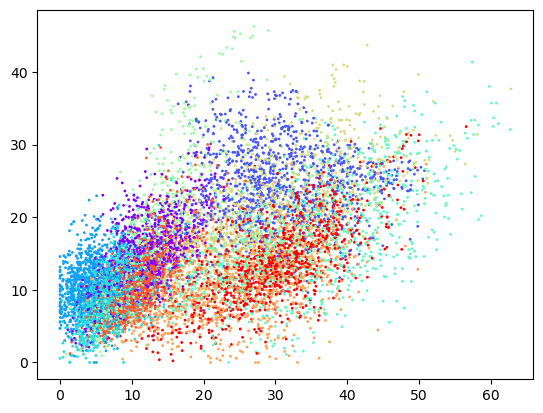

In [29]:
plt.scatter(encoded_imgs[:,1], encoded_imgs[:,3], s=1, c=ytest, cmap='rainbow')
# plt.show()

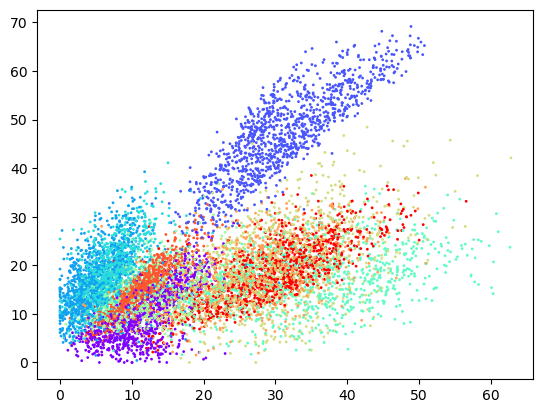

In [30]:
plt.scatter(encoded_imgs[:,1], encoded_imgs[:,2], s=1, c=ytest, cmap='rainbow')
# plt.show()

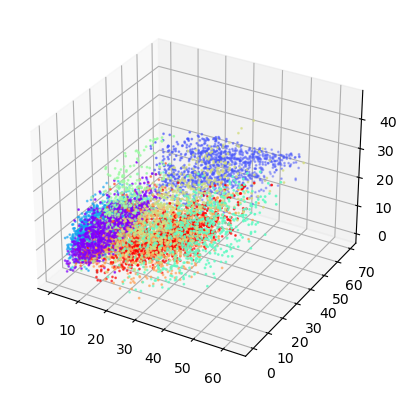

In [31]:
from mpl_toolkits.mplot3d import Axes3D
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.scatter(encoded_imgs[:,1], encoded_imgs[:,2], encoded_imgs[:,3], c=ytest, cmap='rainbow', s=1)

# Assignment


1. change the `encoding_dim` through various values (`range(2,18,2)` and save the loss you can get. Plot the 8 pairs of dimensions vs loss on a scatter plot


In [ ]:
losses = []
for encoding_dim in dimensions:
    
    loss = 
    losses.append(loss)
    



2. **_After_** training an autoencoder with `encoding_dim=8`, apply noise (like the previous assignment) to *_only_* the input of the trained autoencoder (not the output). The output images should be without noise. 

Print a few noisy images along with the output images to show they don't have noise.

In [41]:
# To do this, we will pass in the noise as the first argument to fit,
# replacing the first xtrain. The second xtrain remains as the expected output.
# Same applies to the validation data and xtest.
autoencoder.fit(xtrain, xtrain,
                epochs=50,
                batch_size=256,
                shuffle=True,
                validation_data=(xtest, xtest),
                callbacks=[TensorBoard(log_dir='/tmp/autoencoder')])             #   )

Epoch 1/50
159/235 ━━━━━━━━━━━━━━━━━━━━ 1s 16ms/step - loss: 0.1375

KeyboardInterrupt: 